# EDA

In [1]:
from function import *

In [2]:
# load data
train = pd.read_csv('data/train_merge.csv')
test = pd.read_csv('data/test_merge.csv')

---

### 1. Overall information

In [3]:
# check shape
print('train shape :', train.shape)
print('test shape :', test.shape)

train shape : (2517206, 36)
test shape : (7090630, 35)


In [4]:
# check information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517206 entries, 0 to 2517205
Data columns (total 36 columns):
USER_ID_hash                  object
COUPON_ID_hash                object
CAPSULE_TEXT                  object
GENRE_NAME                    object
SEX_ID                        object
USABLE_DATE_MON               float64
USABLE_DATE_TUE               float64
USABLE_DATE_WED               float64
USABLE_DATE_THU               float64
USABLE_DATE_FRI               float64
USABLE_DATE_SAT               float64
USABLE_DATE_SUN               float64
USABLE_DATE_HOLIDAY           float64
USABLE_DATE_BEFORE_HOLIDAY    float64
large_area_name               object
ken_name                      object
small_area_name               object
DISPFROM_year                 int64
DISPFROM_month                int64
DISPFROM_weekday              int64
DISPFROM_hour                 int64
DISPEND_year                  int64
DISPEND_month                 int64
DISPEND_weekday               int

In [5]:
# Unique
print('train unique 갯수')
for i in range(36):
    print('{} : {}개'.format(train.columns[i], len(set(train[train.columns[i]]))))

train unique 갯수
USER_ID_hash : 22748개
COUPON_ID_hash : 19412개
CAPSULE_TEXT : 24개
GENRE_NAME : 13개
SEX_ID : 2개
USABLE_DATE_MON : 2개
USABLE_DATE_TUE : 2개
USABLE_DATE_WED : 2개
USABLE_DATE_THU : 2개
USABLE_DATE_FRI : 2개
USABLE_DATE_SAT : 2개
USABLE_DATE_SUN : 2개
USABLE_DATE_HOLIDAY : 2개
USABLE_DATE_BEFORE_HOLIDAY : 2개
large_area_name : 9개
ken_name : 47개
small_area_name : 55개
DISPFROM_year : 2개
DISPFROM_month : 12개
DISPFROM_weekday : 7개
DISPFROM_hour : 5개
DISPEND_year : 2개
DISPEND_month : 12개
DISPEND_weekday : 7개
DISPEND_hour : 6개
REG_year : 3개
REG_month : 12개
REG_weekday : 7개
REG_hour : 24개
PRICE_RATE : 71개
CATALOG_PRICE : 2415개
DISCOUNT_PRICE : 1115개
DISPPERIOD : 18개
VALIDPERIOD : 180개
AGE : 66개
PURCHASE_FLG : 2개


---

### 2. Y data

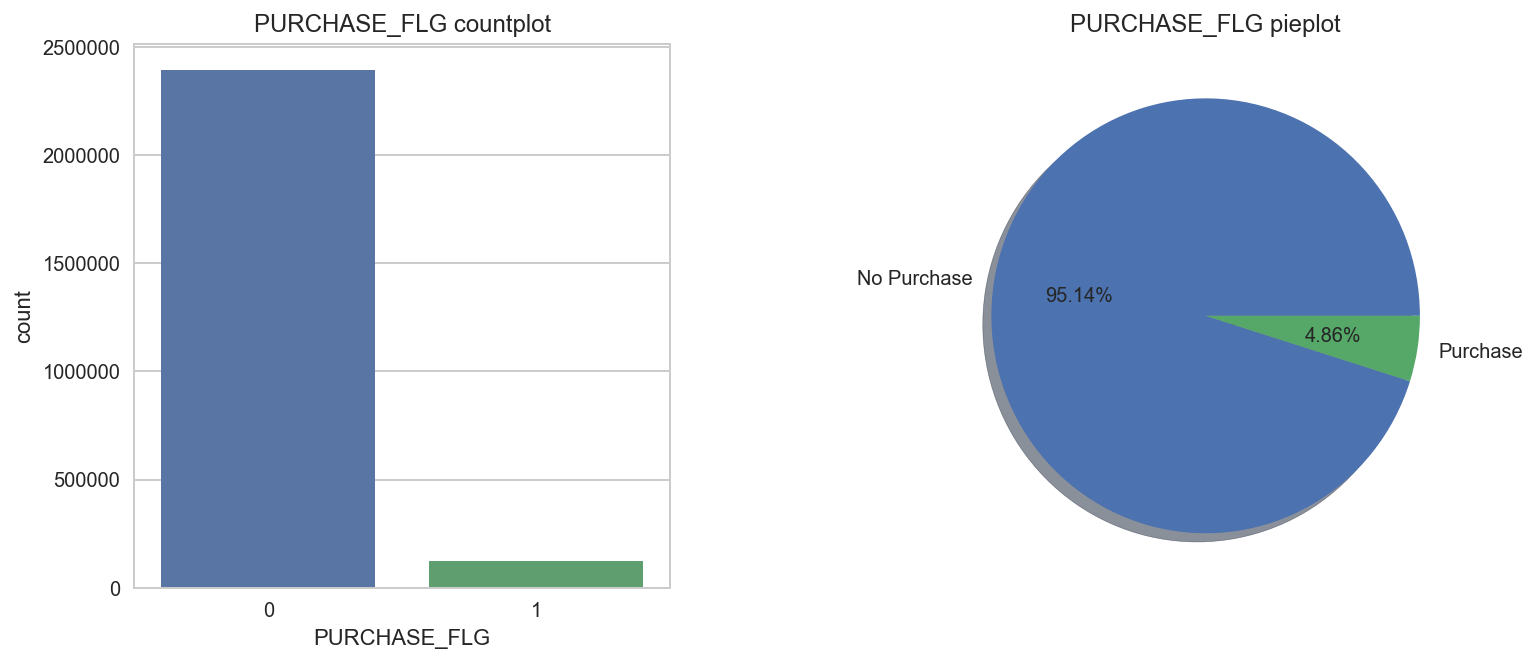

In [6]:
# y_data
plt.figure(figsize=(12, 5))
subplots_adjust(wspace = 0.5)
df = pd.DataFrame([len(train[train['PURCHASE_FLG'] == 0])/len(train), 
                   len(train[train['PURCHASE_FLG'] == 1])/len(train)], 
                   index=['No Purchase', 'Purchase'], columns=['x'])

# countplot
plt.subplot(1, 2, 1)
sns.countplot(x = 'PURCHASE_FLG', data = train)
plt.title('PURCHASE_FLG countplot')
labels = 'No Purchase', 'Purchase'

# pieplot
plt.subplot(1, 2, 2)
plt.pie(df, labels = labels, autopct='%1.2f%%', shadow = True, explode = (0.0, 0.0))
plt.title('PURCHASE_FLG pieplot')

plt.show()

### 3. Y data & X data

#### 3.1 Genre

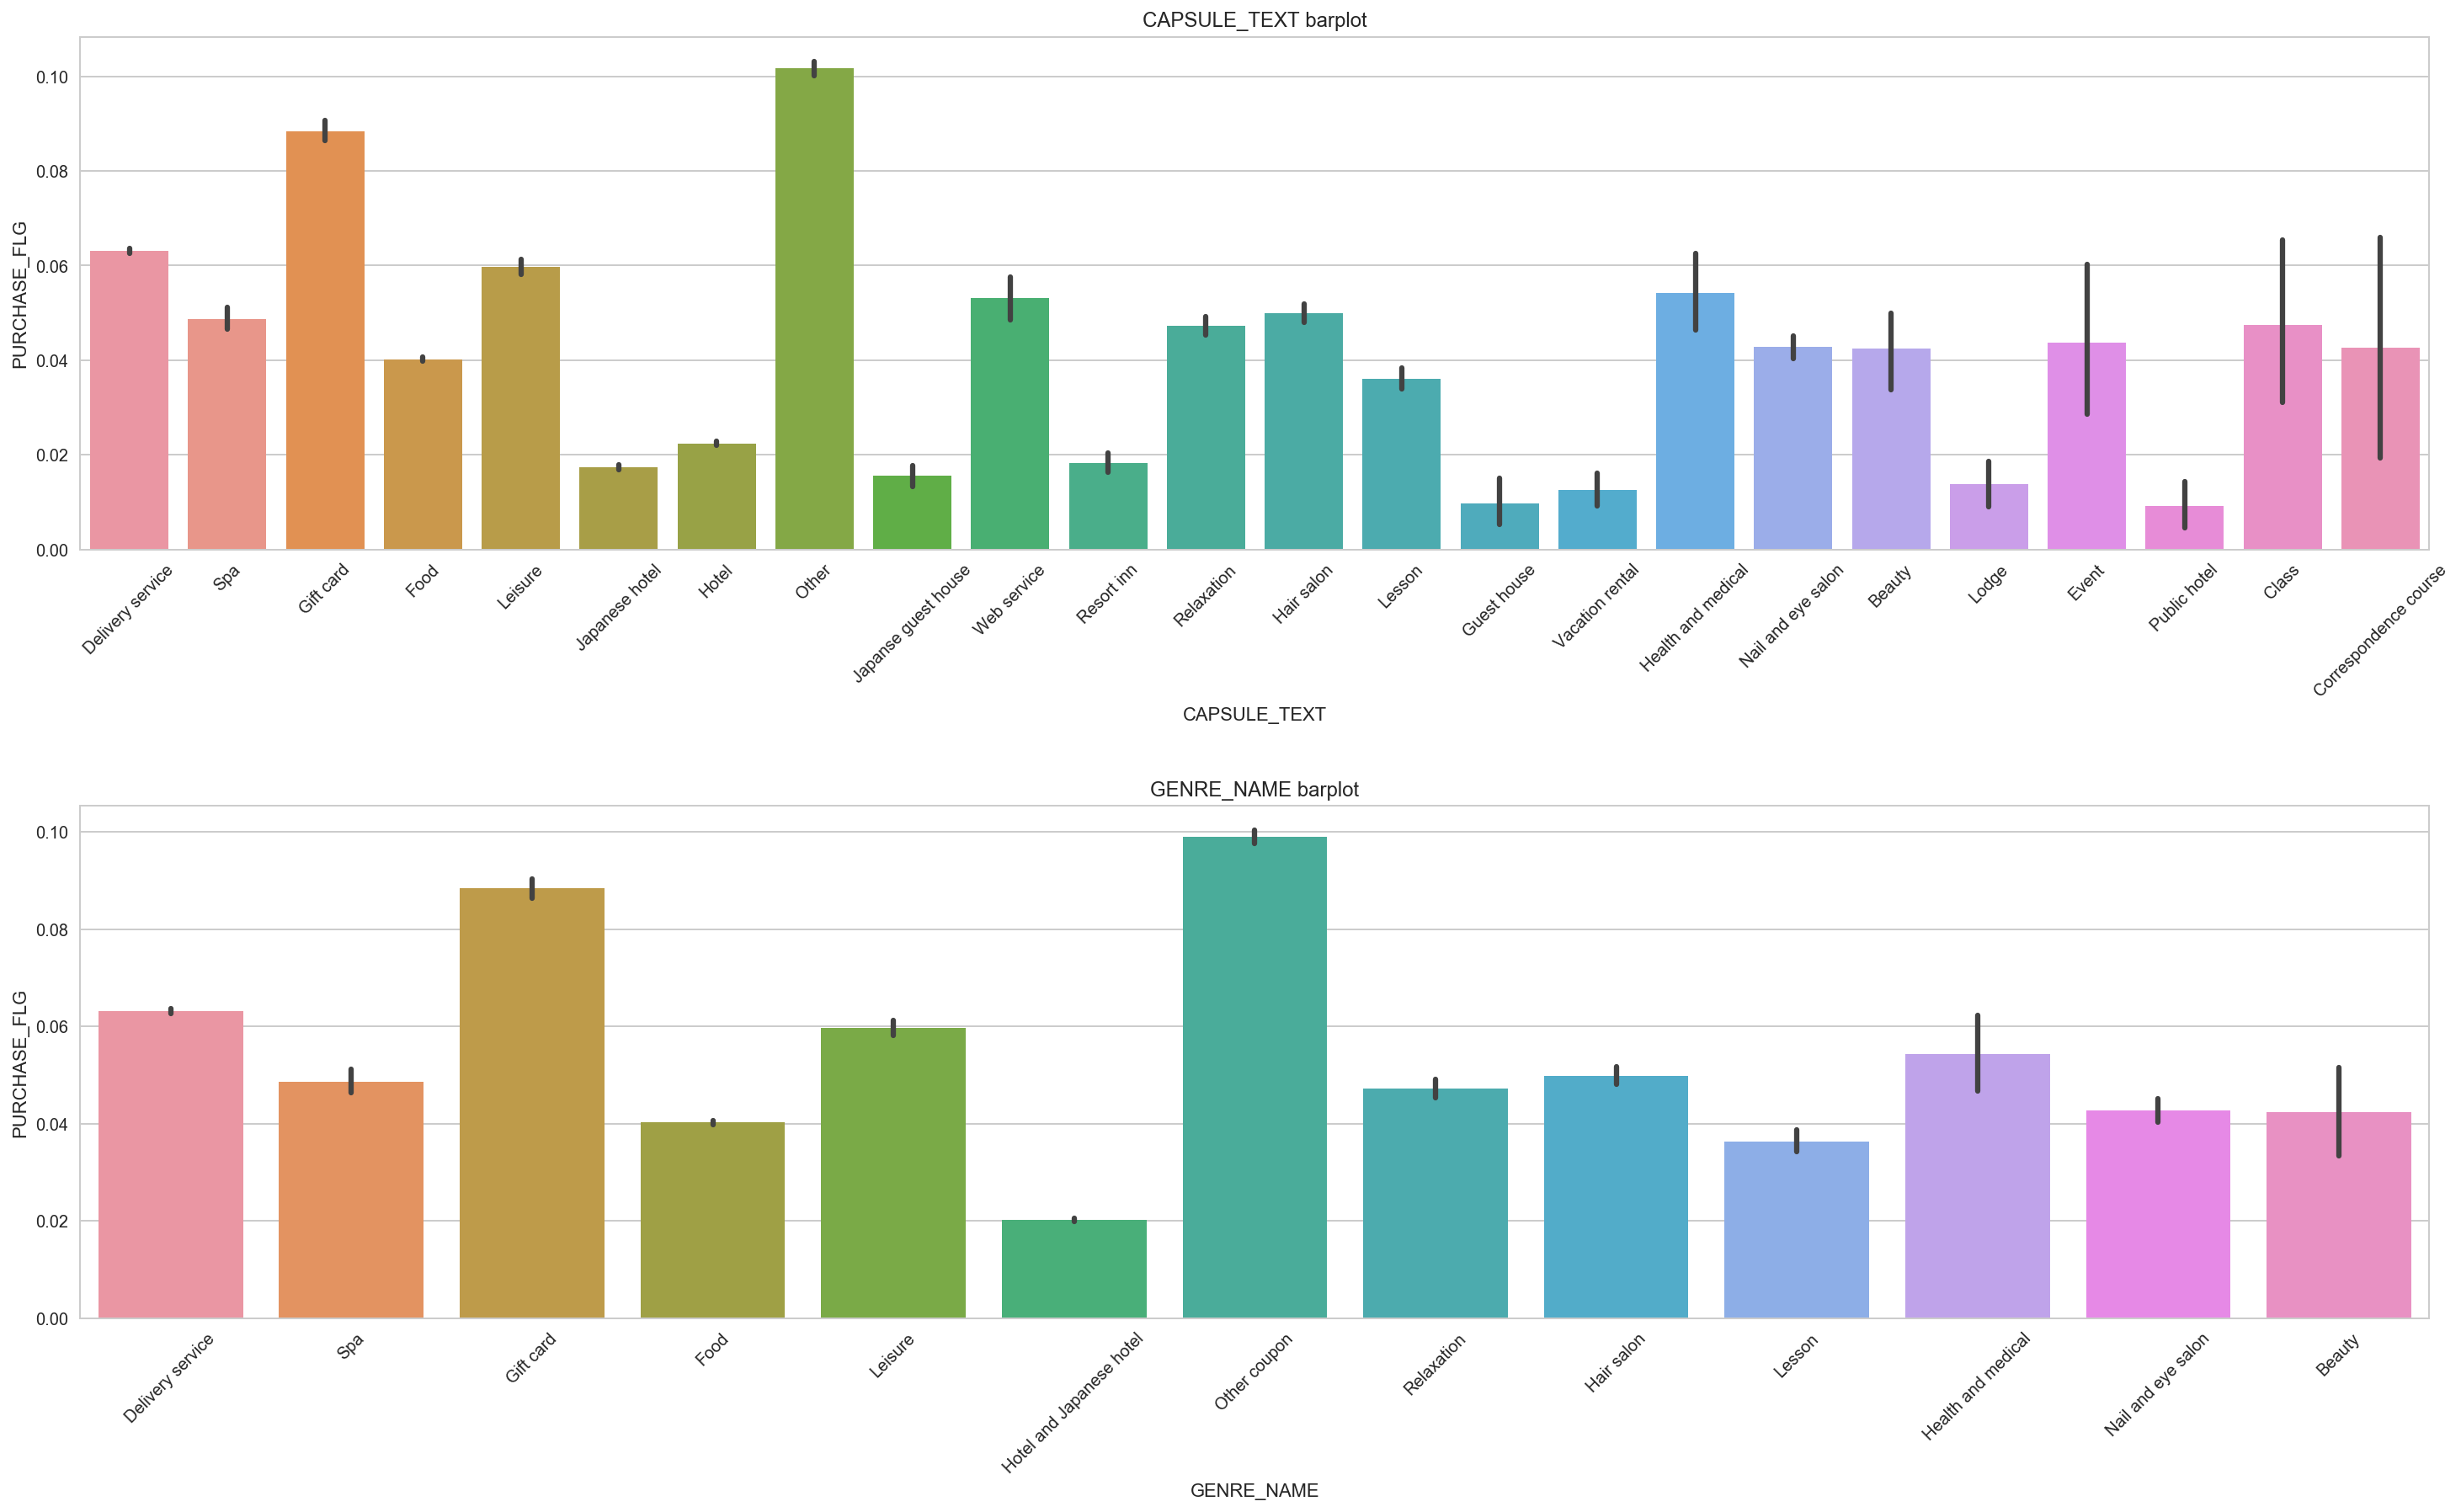

In [7]:
# Gengre barplot
plt.figure(figsize=(25, 14))
subplots_adjust(hspace = 0.5)

# CAPSULE_TEXT
plt.subplot(2, 1, 1)
sns.barplot(x = 'CAPSULE_TEXT', y = 'PURCHASE_FLG', data = train)
plt.title('CAPSULE_TEXT barplot')
plt.xticks(rotation='45')

# GENRE_NAME
plt.subplot(2, 1, 2)
sns.barplot(x = 'GENRE_NAME', y = 'PURCHASE_FLG', data = train)
plt.title('GENRE_NAME barplot')
plt.xticks(rotation='45')

plt.show()

#### 3.2 Category

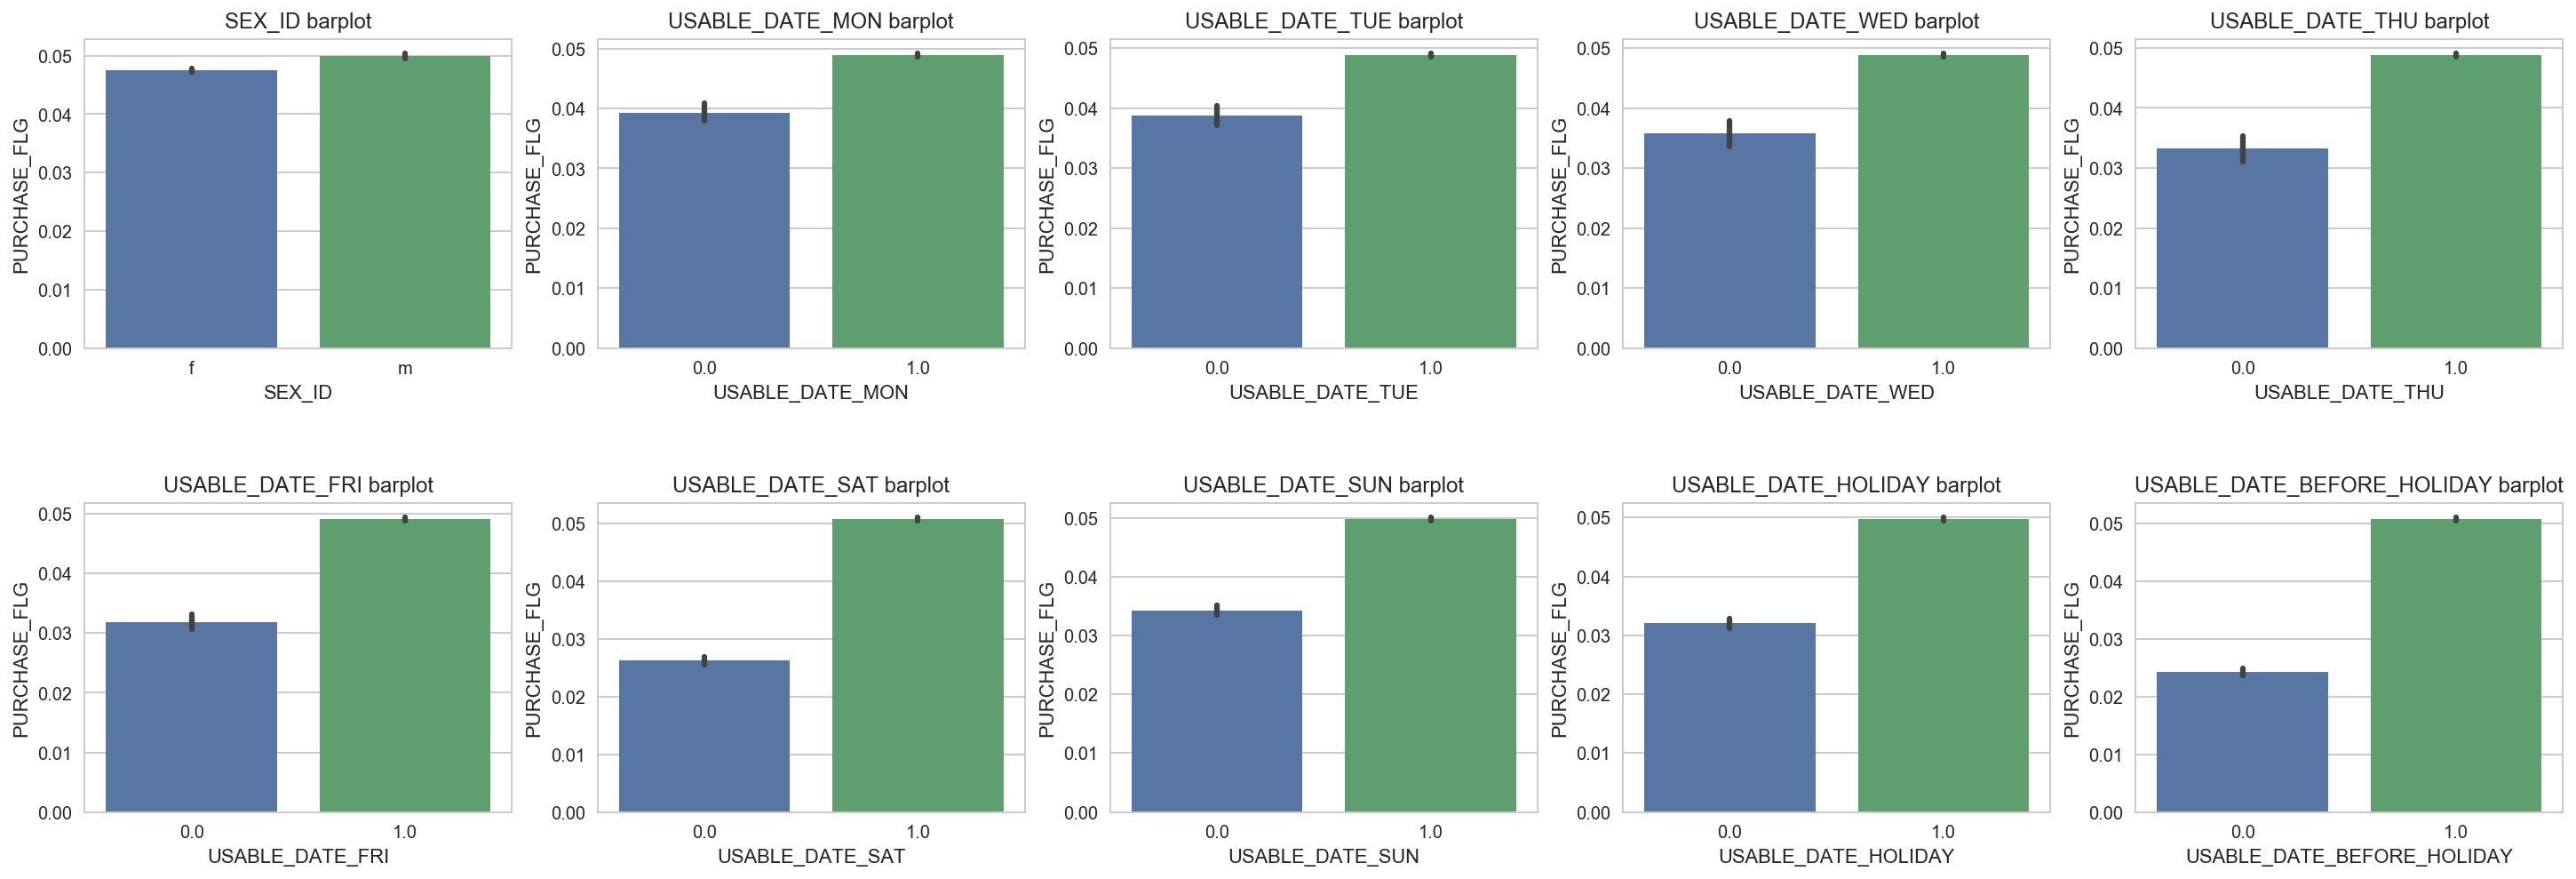

In [8]:
# category barplot
plt.figure(figsize=(25, 8))
subplots_adjust(hspace = 0.5)

for i in range(4, 13+1):
    plt.subplot(2, 5, i-3)
    sns.barplot(x = train[train.columns[i]], y = train['PURCHASE_FLG'])
    plt.title('{} barplot'.format(train.columns[i]))

#### 3.3 Location

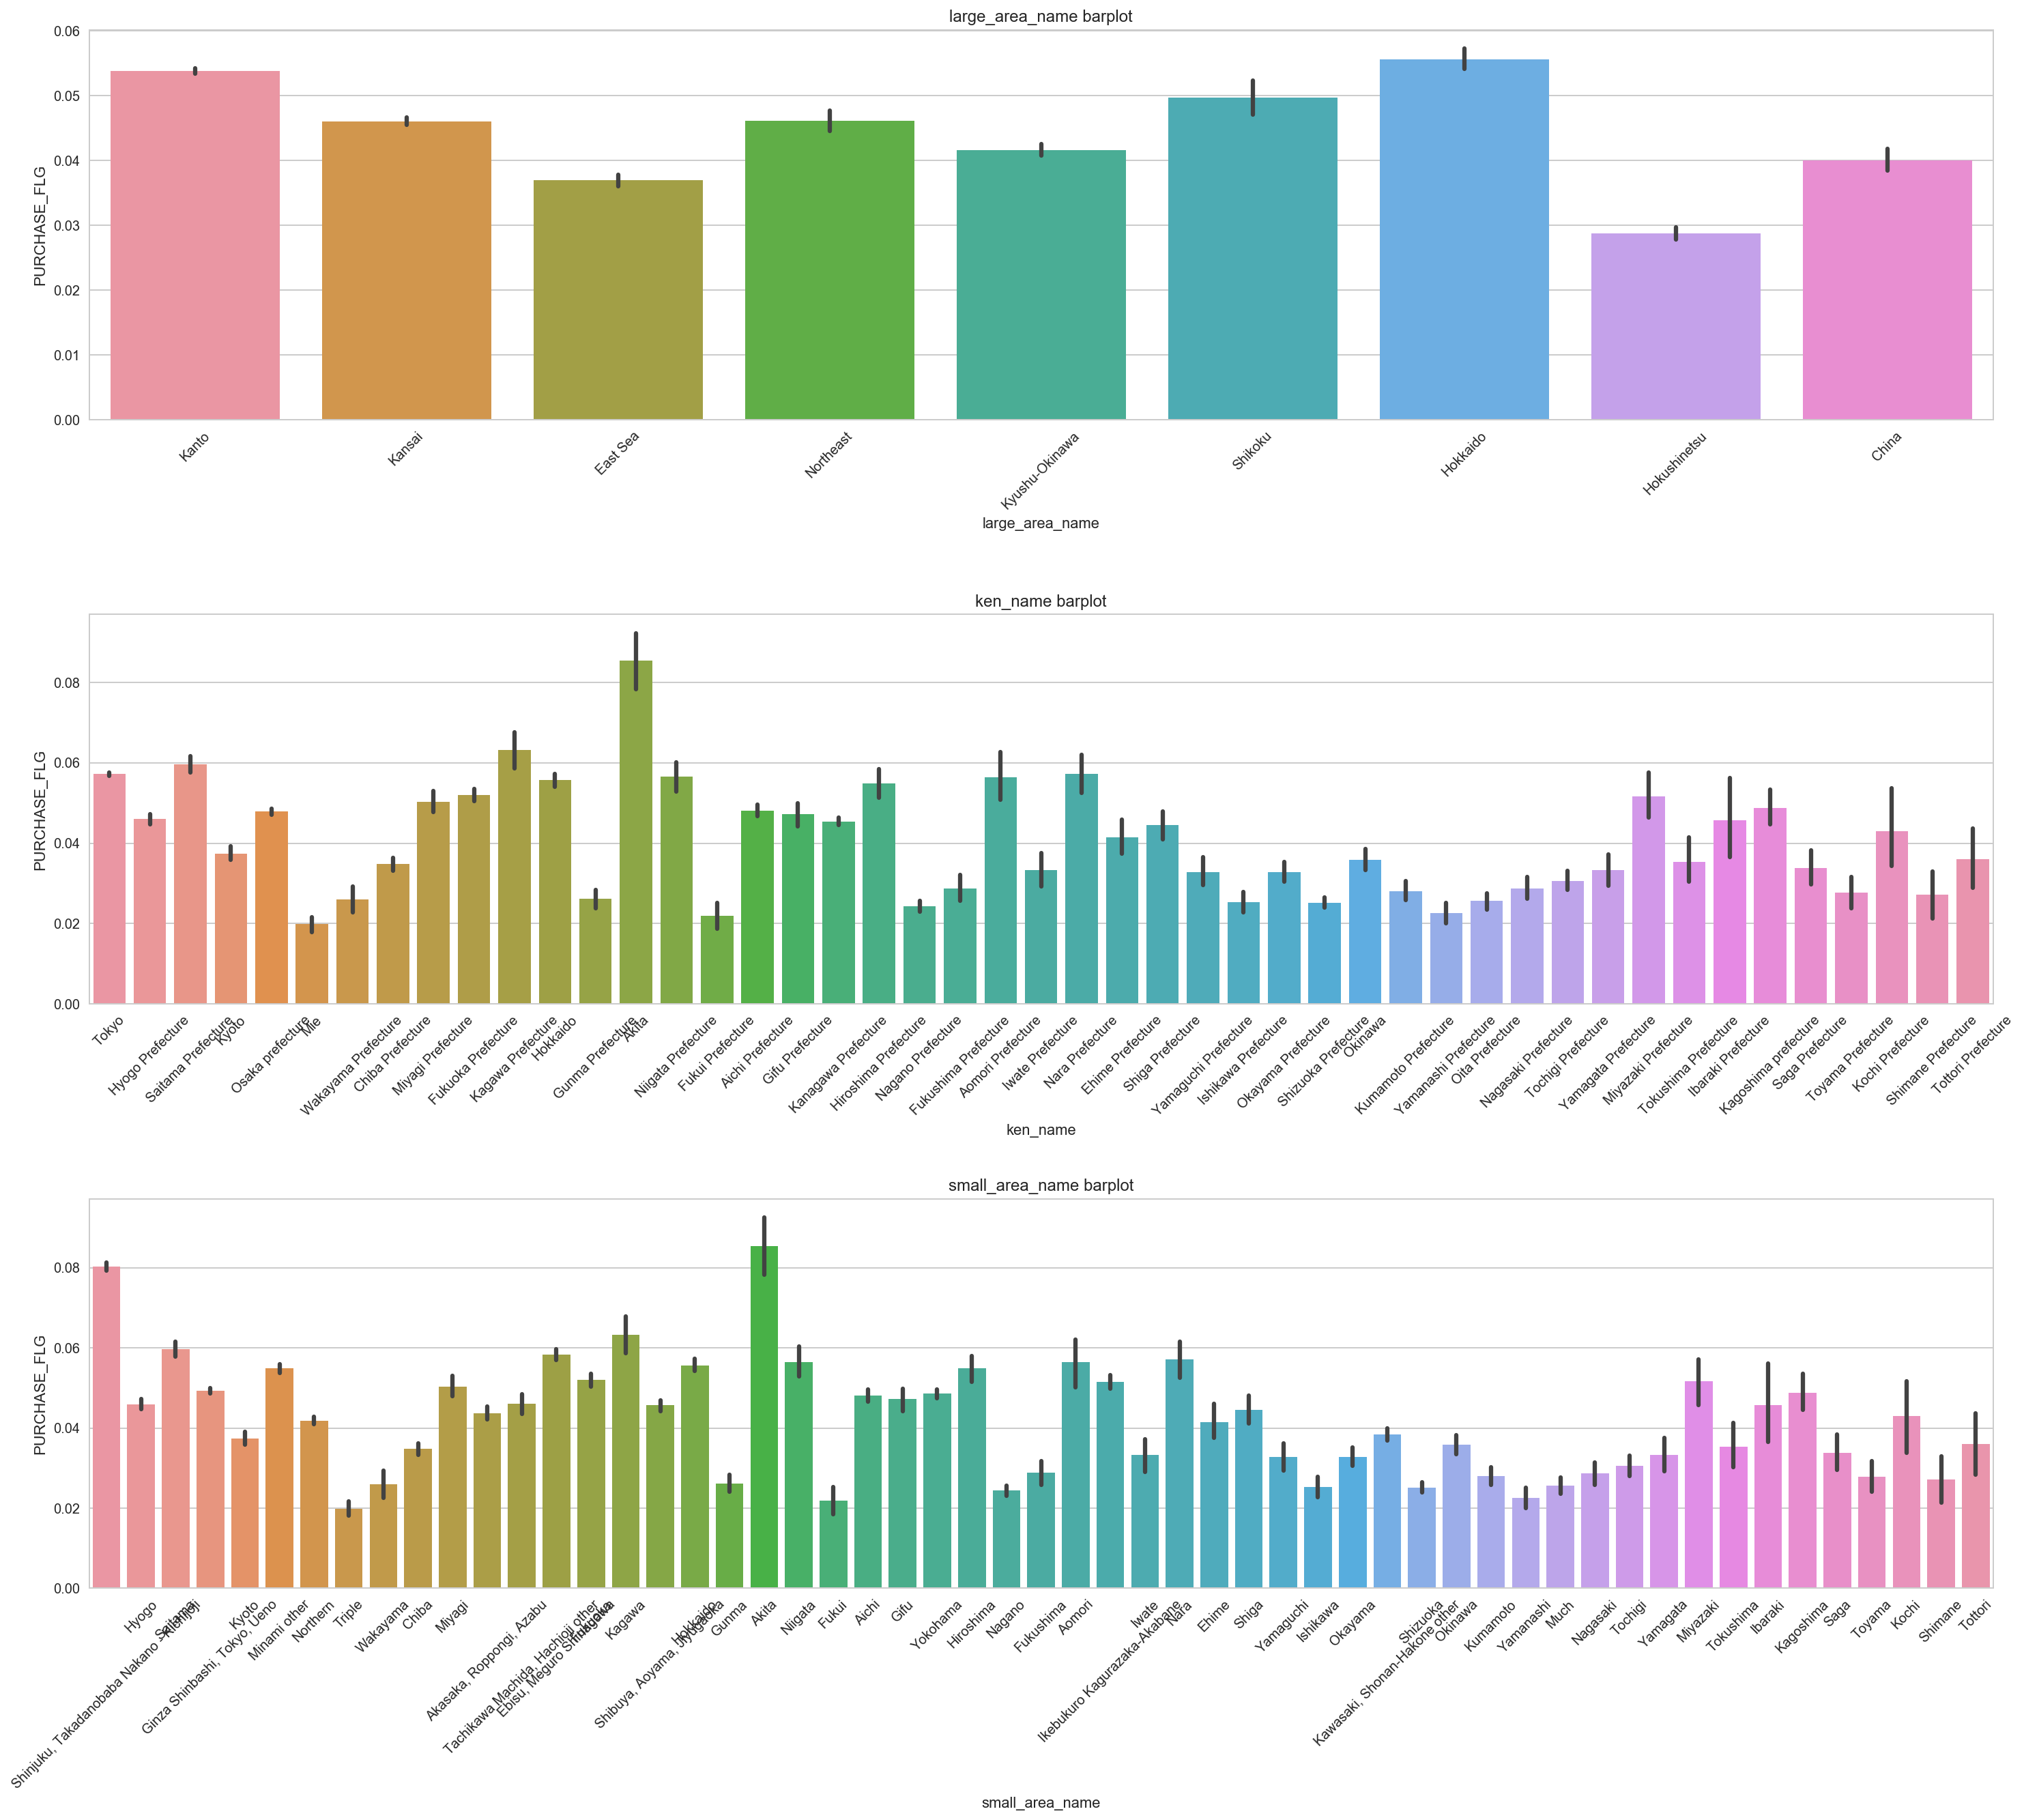

In [9]:
# Location barplot
plt.figure(figsize=(25, 21))
subplots_adjust(hspace = 0.5)

# large_area_name
plt.subplot(3, 1, 1)
sns.barplot(x = 'large_area_name', y = 'PURCHASE_FLG', data = train)
plt.title('large_area_name barplot')
plt.xticks(rotation='45')

# ken_name
plt.subplot(3, 1, 2)
sns.barplot(x = 'ken_name', y = 'PURCHASE_FLG', data = train)
plt.title('ken_name barplot')
plt.xticks(rotation='45')

# small_area_name
plt.subplot(3, 1, 3)
sns.barplot(x = 'small_area_name', y = 'PURCHASE_FLG', data = train)
plt.title('small_area_name barplot')
plt.xticks(rotation='45')

plt.show()

#### 3.4 Date

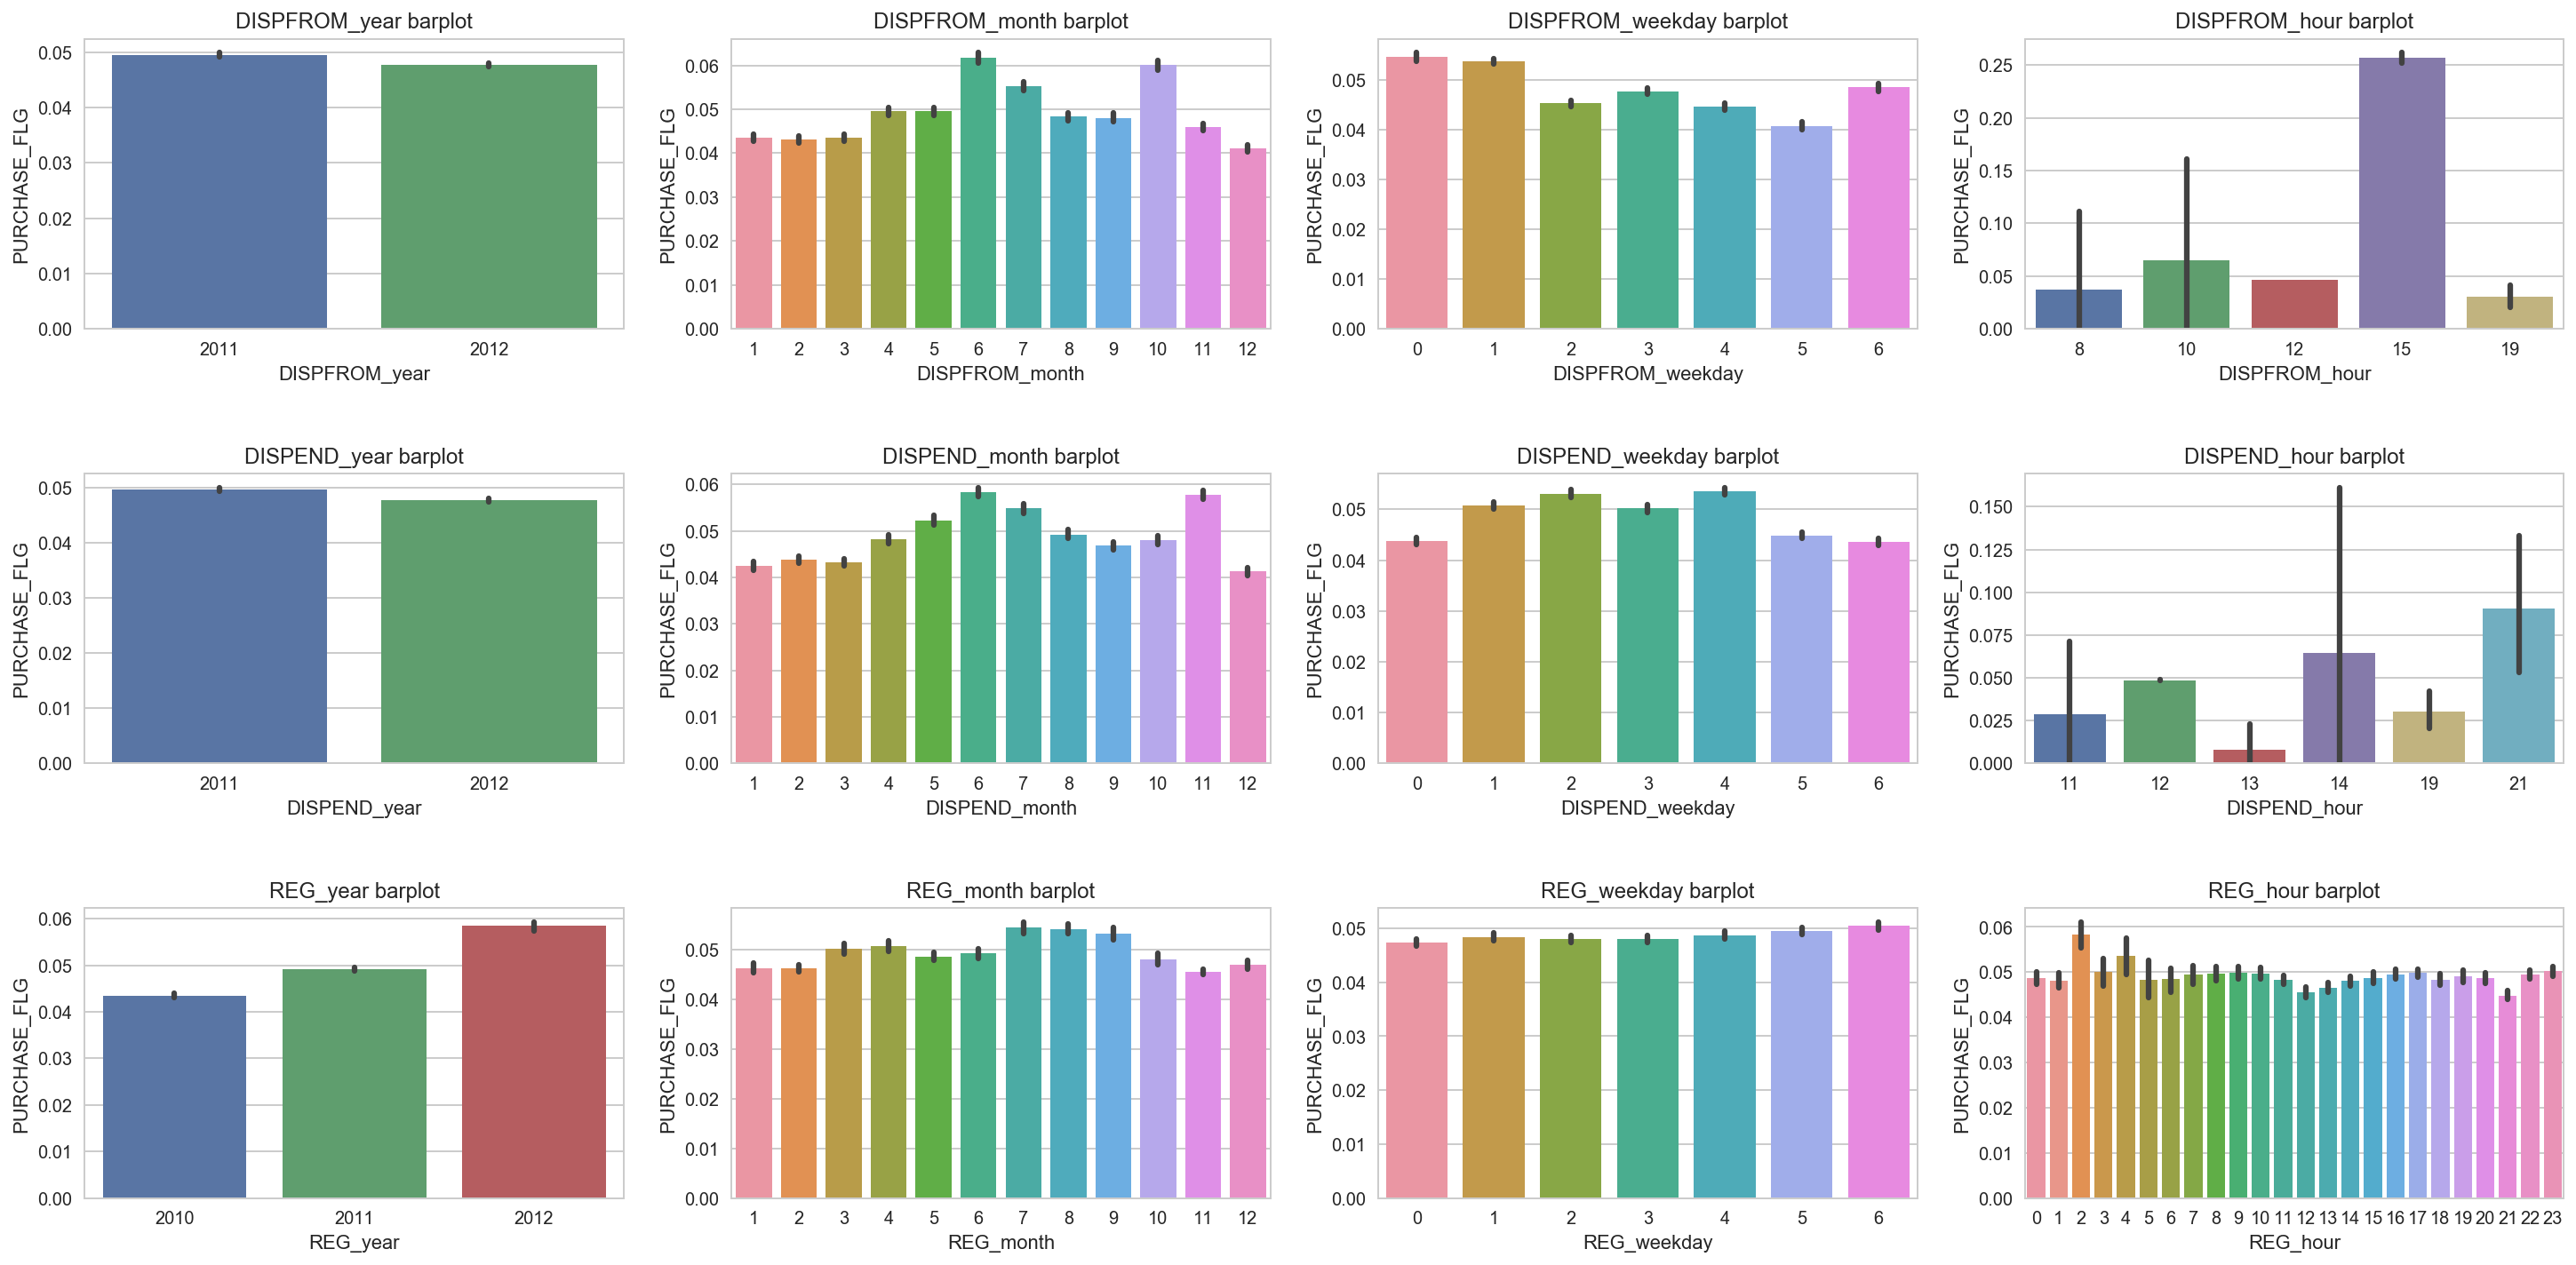

In [10]:
# feature barplot
plt.figure(figsize=(25, 12))
subplots_adjust(hspace = 0.5)

for i in range(17, 28+1) :
    plt.subplot(3, 4, i-16)
    sns.barplot(x = train[train.columns[i]], y = train['PURCHASE_FLG'])
    plt.title('{} barplot'.format(train.columns[i]))

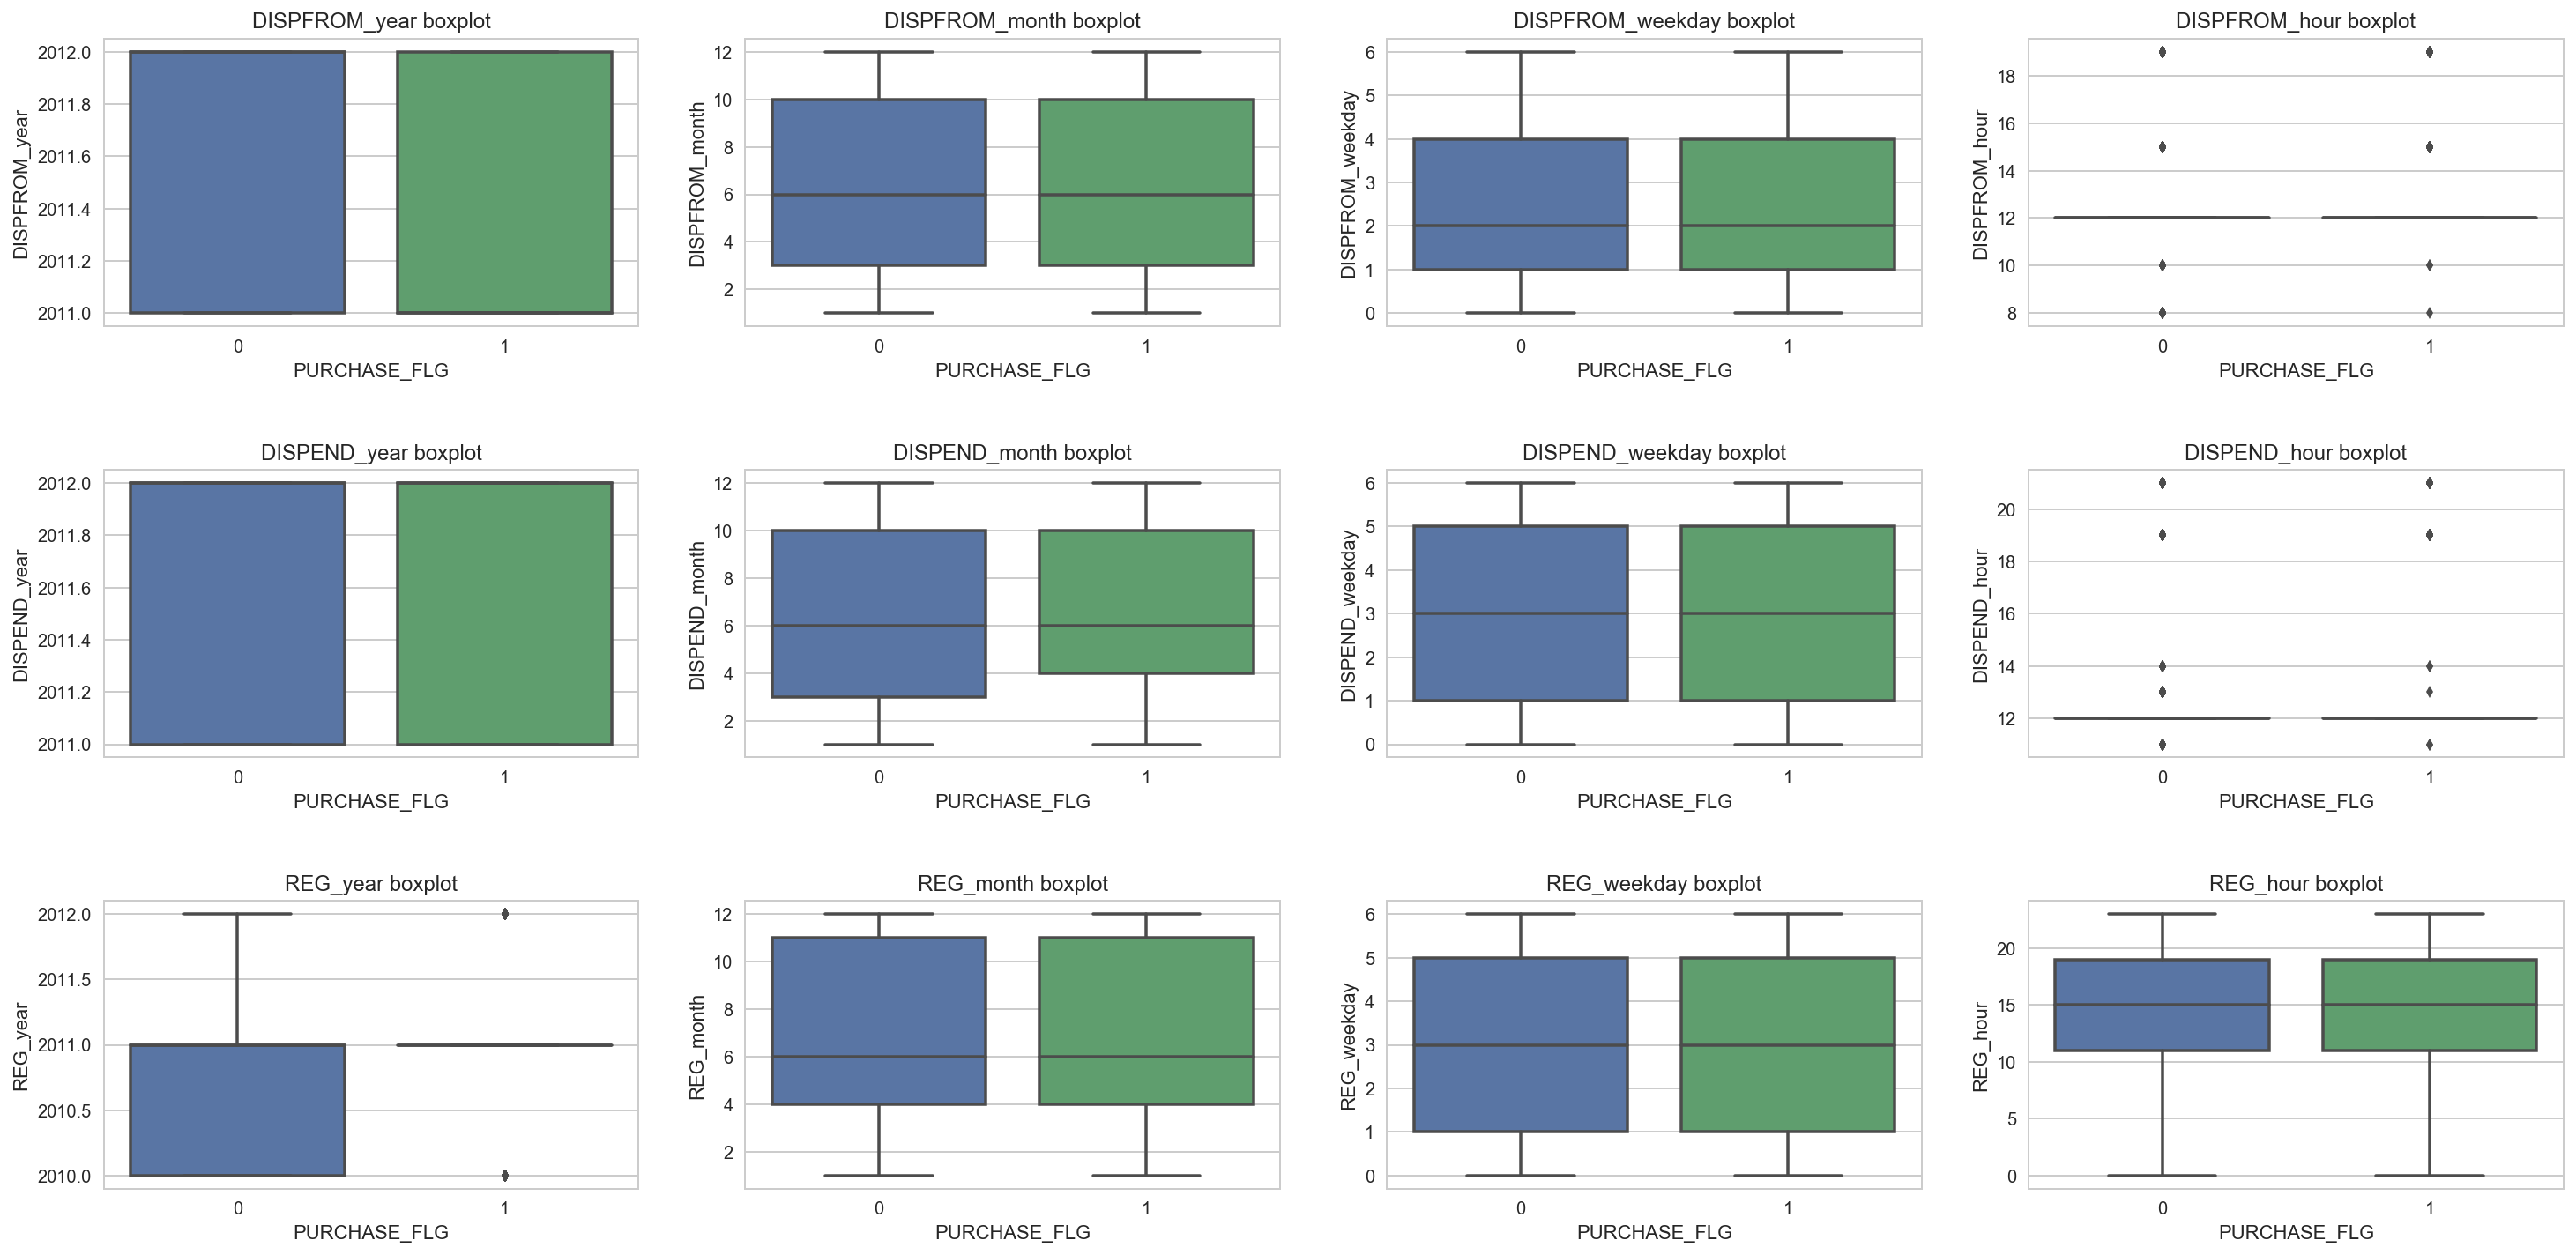

In [11]:
# detail boxplot
plt.figure(figsize=(25, 12))
subplots_adjust(hspace = 0.5)

for i in range(17, 28+1) :
    plt.subplot(3, 4, i-16)
    sns.boxplot(x = train['PURCHASE_FLG'], y = train[train.columns[i]], data = train)
    plt.title('{} boxplot'.format(train.columns[i]))

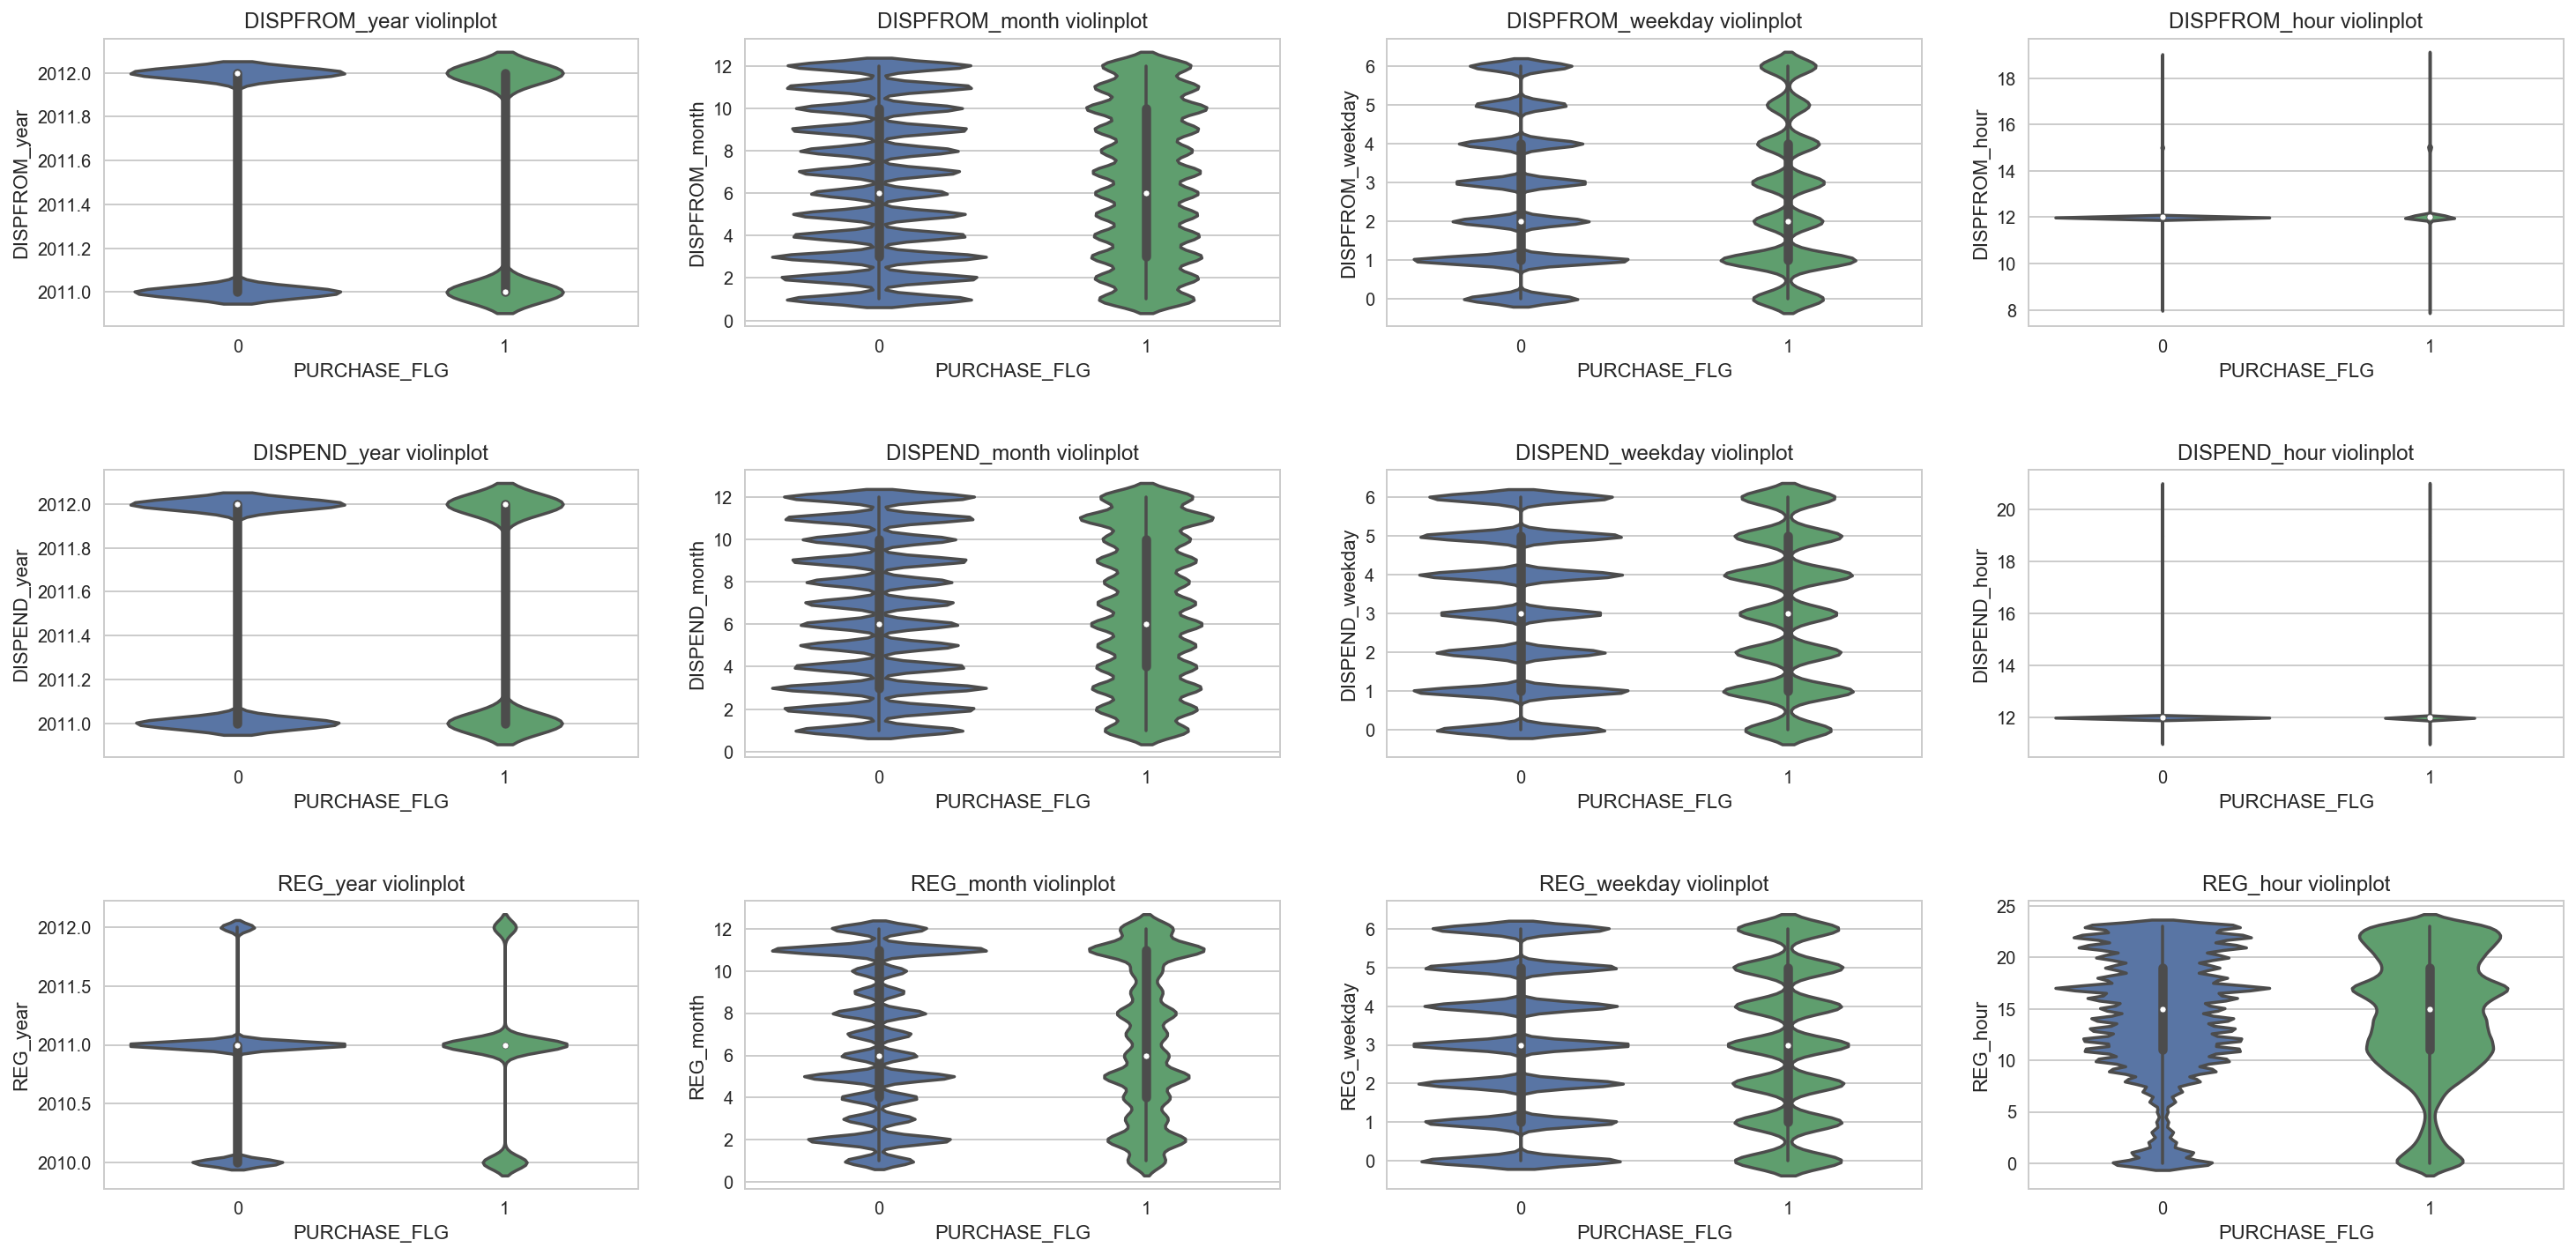

In [12]:
# detail violinplot
plt.figure(figsize=(25, 12))
subplots_adjust(hspace = 0.5)

for i in range(17, 28+1) :
    plt.subplot(3, 4, i-16)
    sns.violinplot(x = train['PURCHASE_FLG'], y = train[train.columns[i]], data = train)
    plt.title('{} violinplot'.format(train.columns[i]))

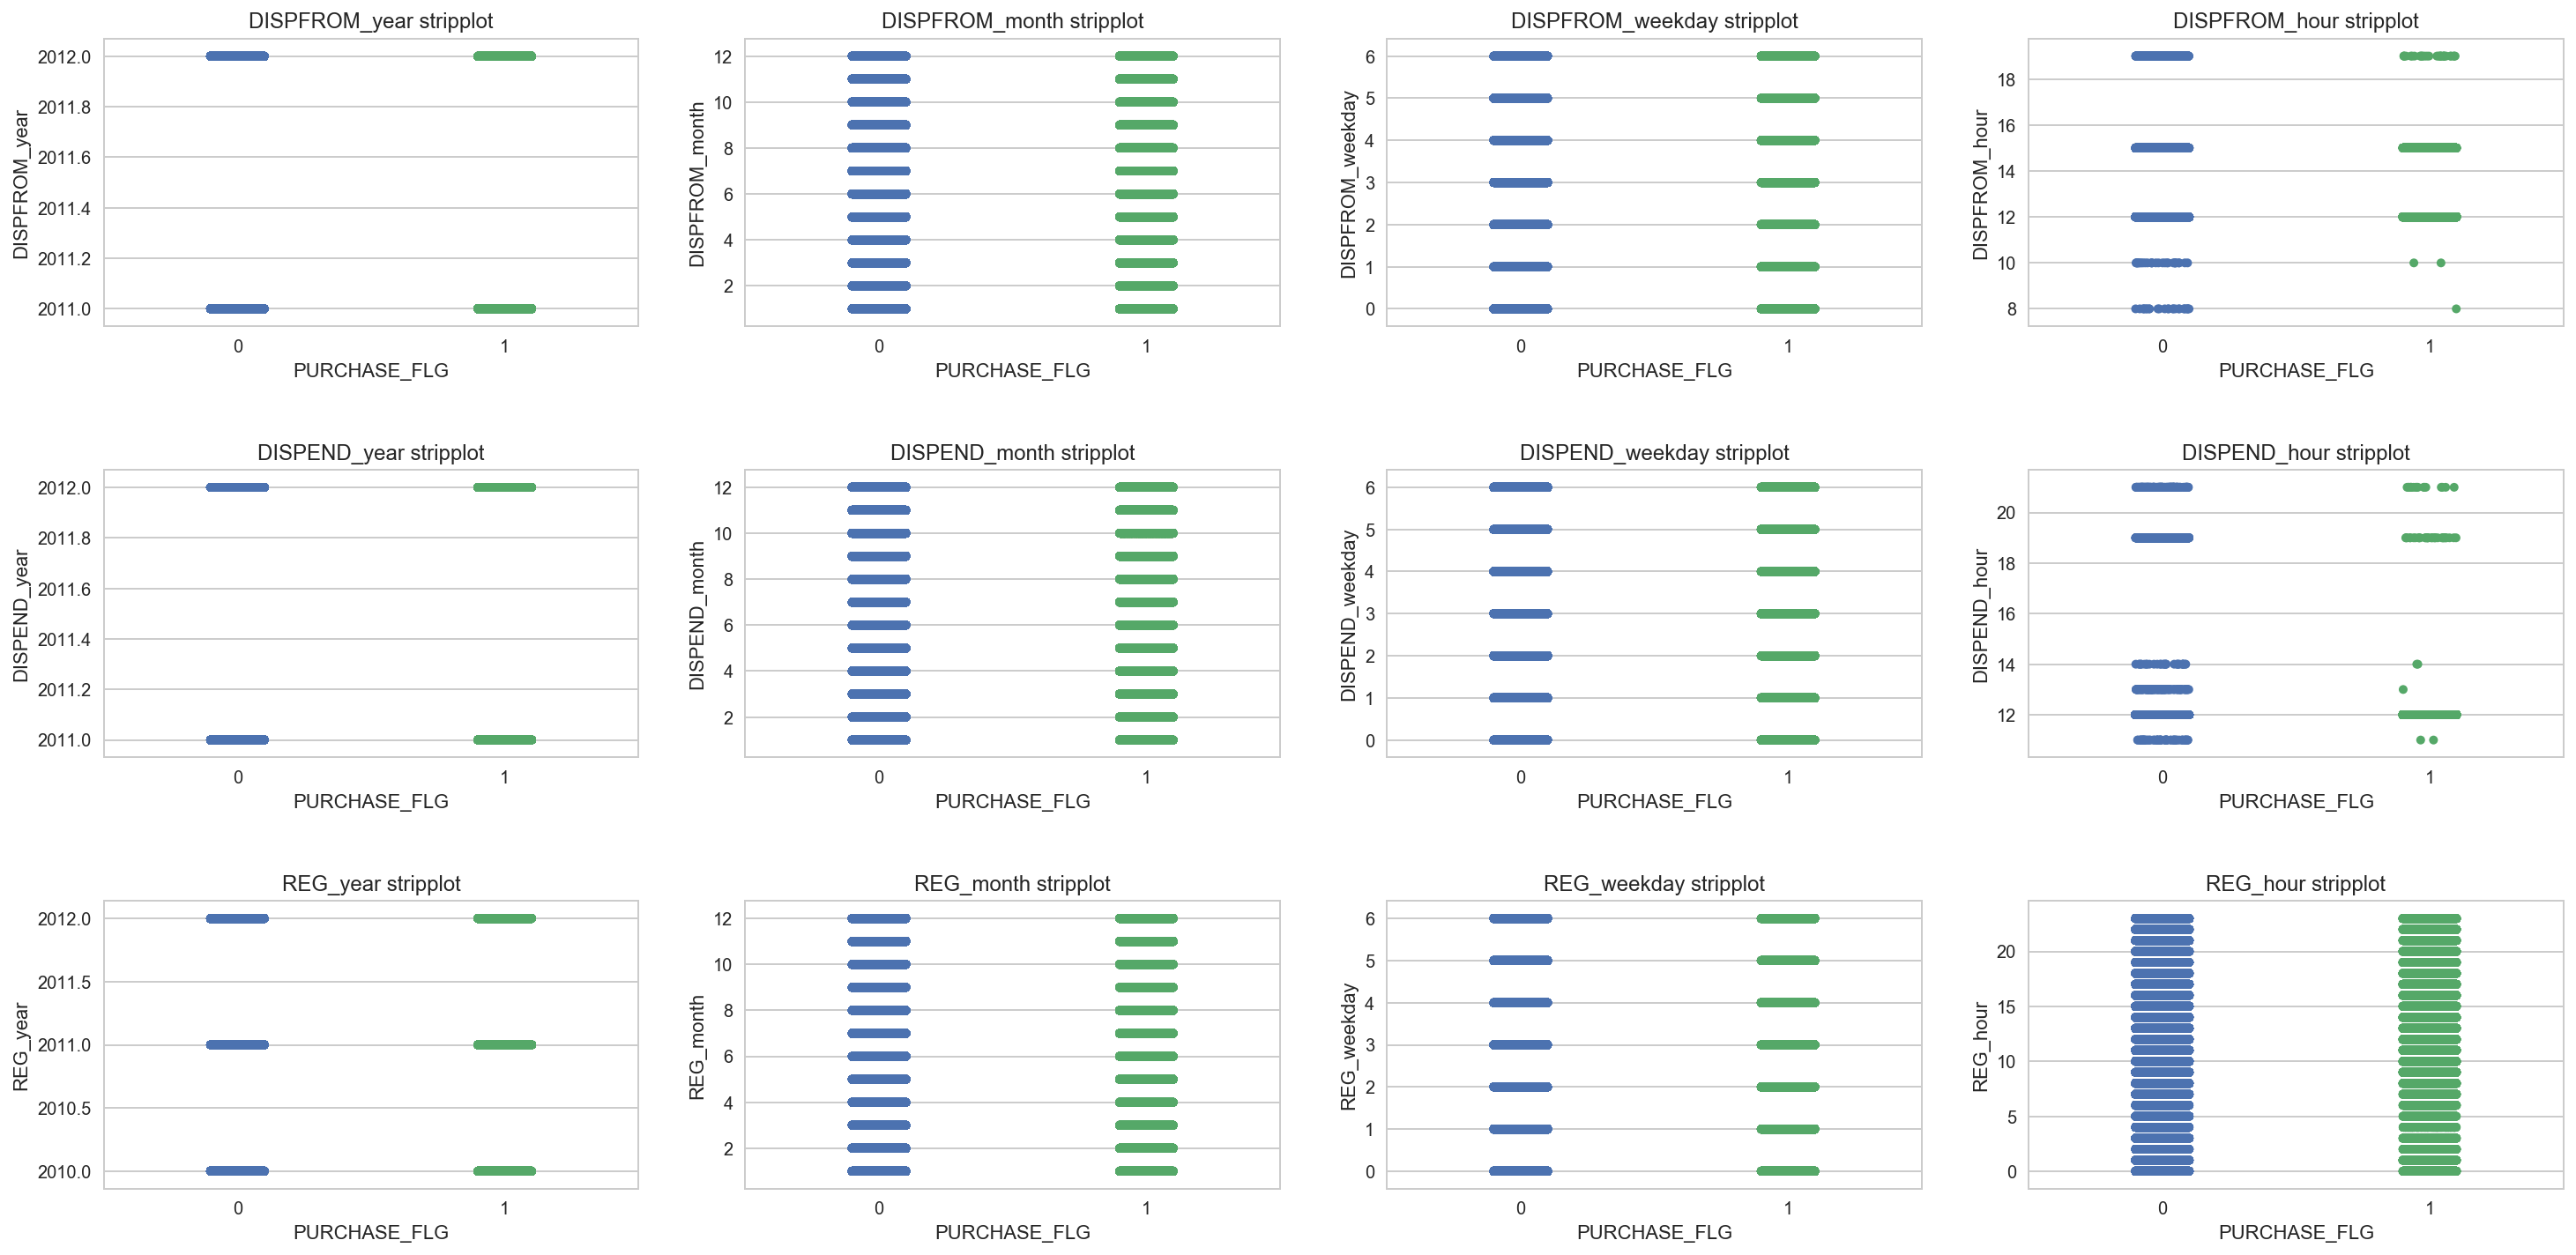

In [13]:
# detail stripplot
plt.figure(figsize=(25, 12))
subplots_adjust(hspace = 0.5)

for i in range(17, 28+1) :
    plt.subplot(3, 4, i-16)
    sns.stripplot(x = train['PURCHASE_FLG'], y = train[train.columns[i]], data = train,  jitter=True)
    plt.title('{} stripplot'.format(train.columns[i]))

#### 3.5 Continuos

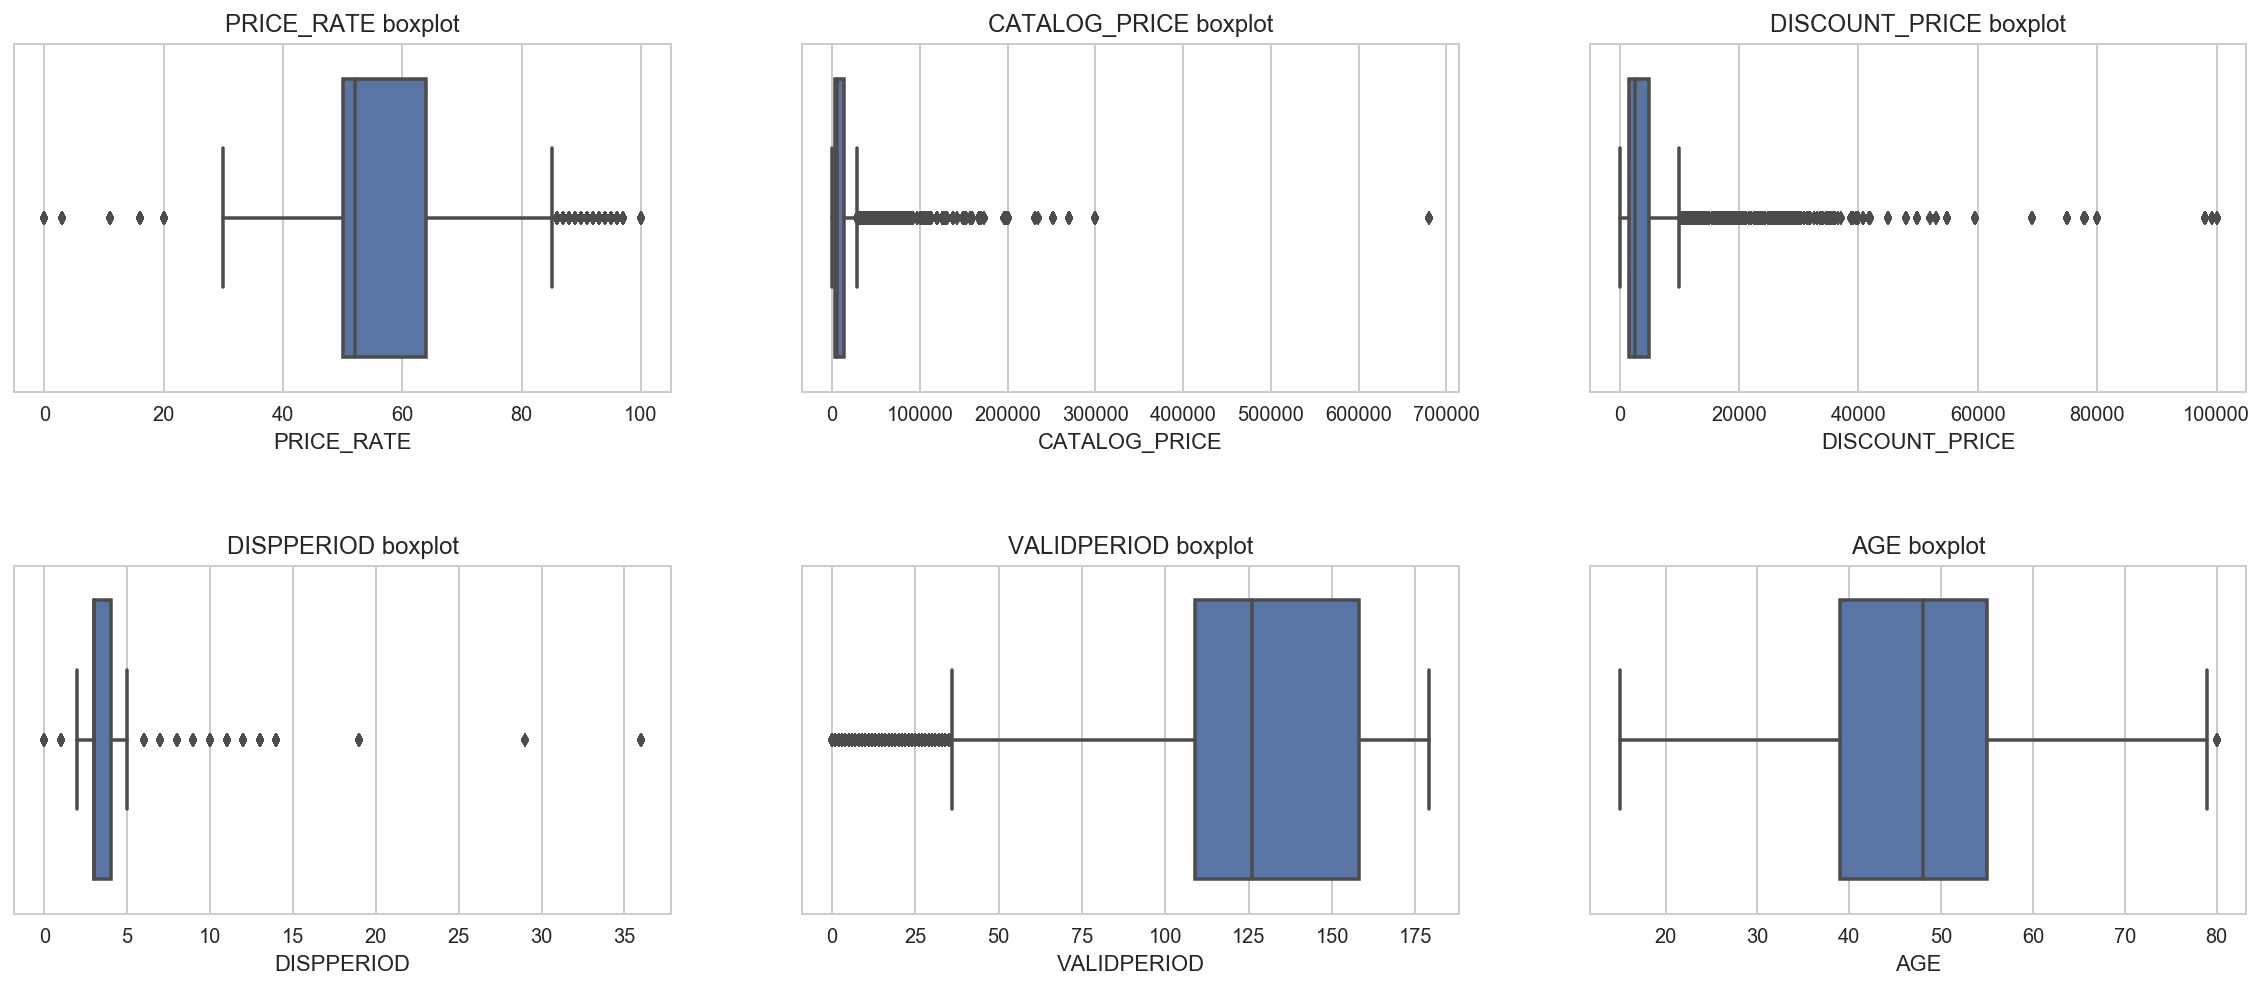

In [14]:
# feature boxplot
plt.figure(figsize=(20, 8))
subplots_adjust(hspace = 0.5)

for i in range(29, 34+1):
    plt.subplot(2, 3, i-28)
    sns.boxplot(x = train[train.columns[i]])
    plt.title('{} boxplot'.format(train.columns[i]))

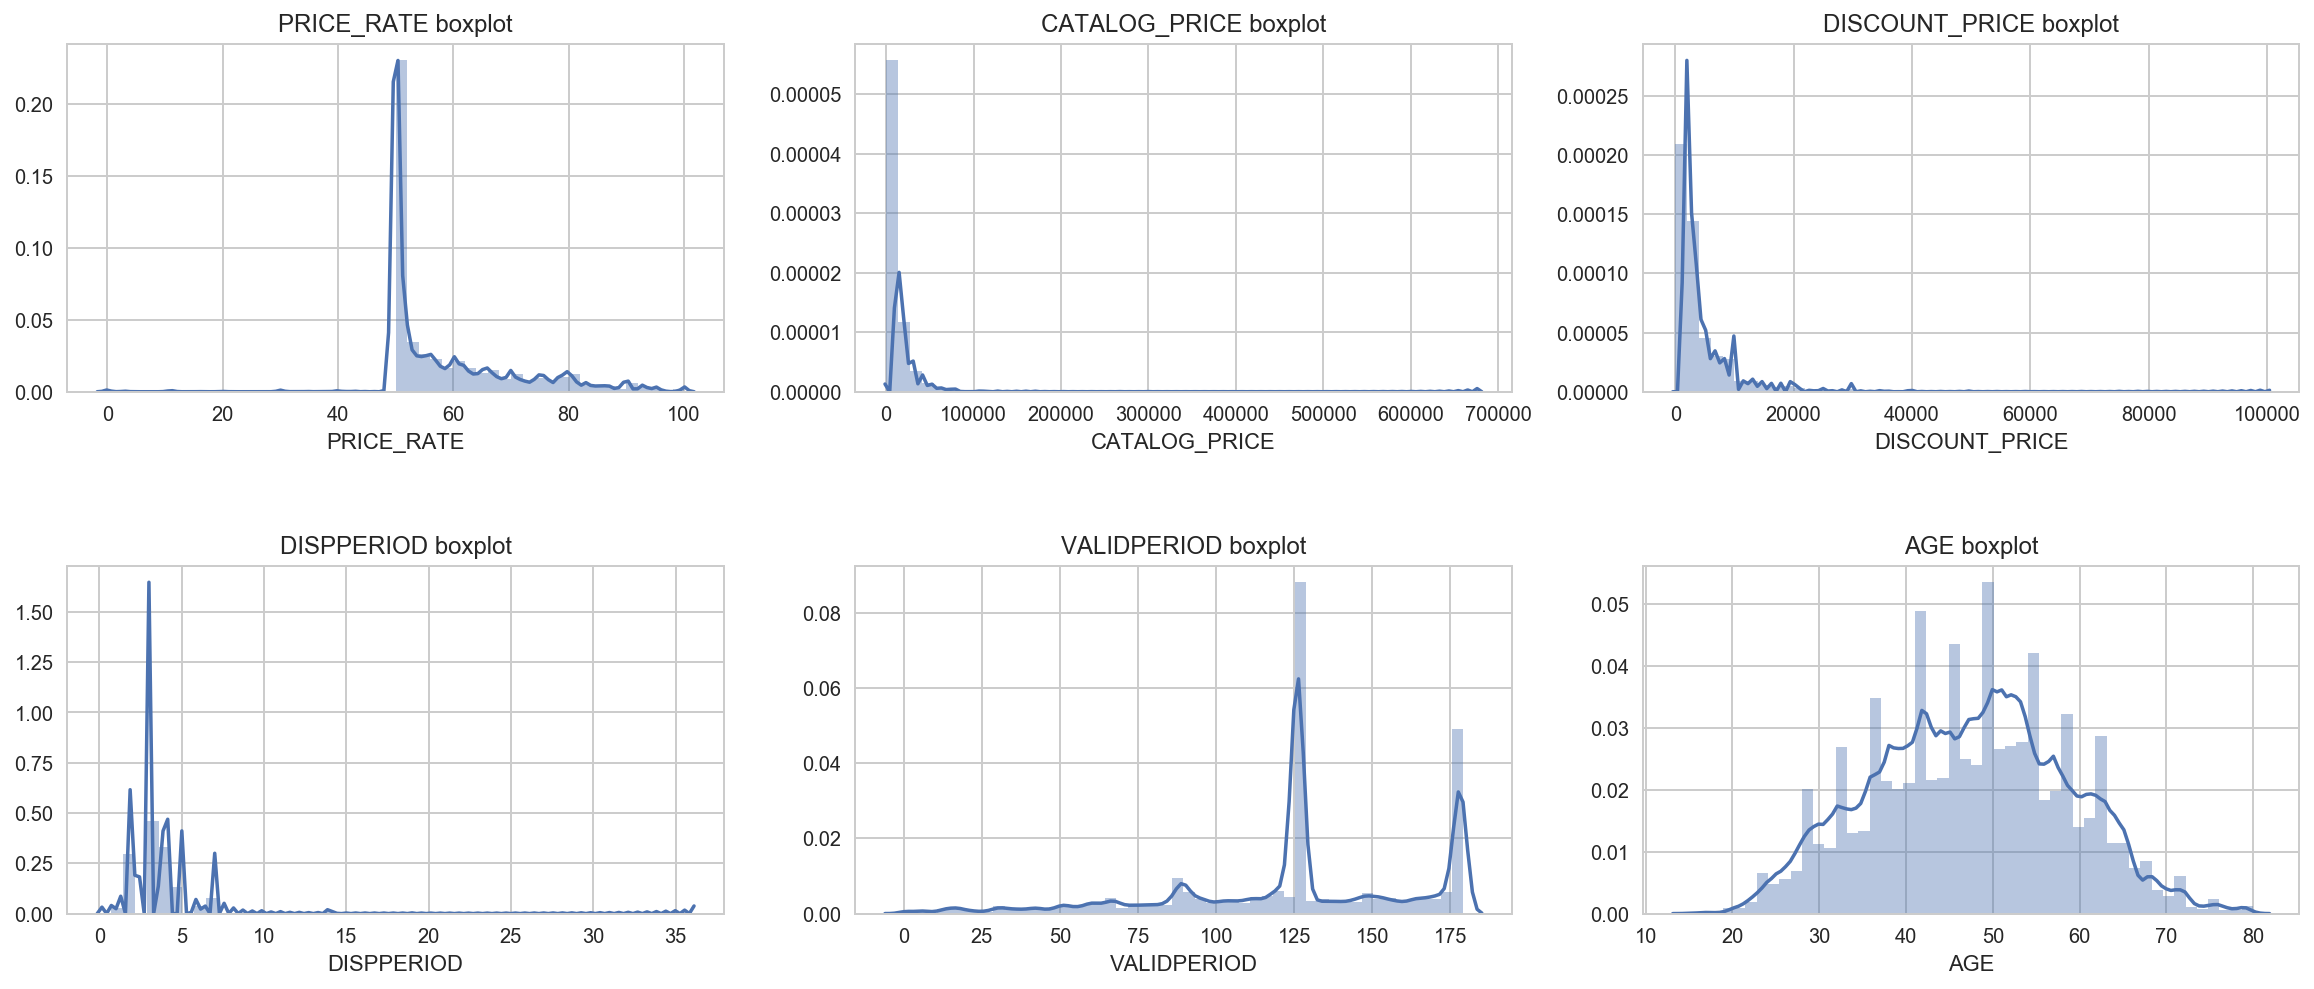

In [15]:
# feature distplot
plt.figure(figsize=(20, 8))
subplots_adjust(hspace = 0.5)

for i in range(29, 34+1):
    plt.subplot(2, 3, i-28)
    sns.distplot(train[train.columns[i]].values, axlabel = train.columns[i])
    plt.title('{} boxplot'.format(train.columns[i]))

### 4.Correlation

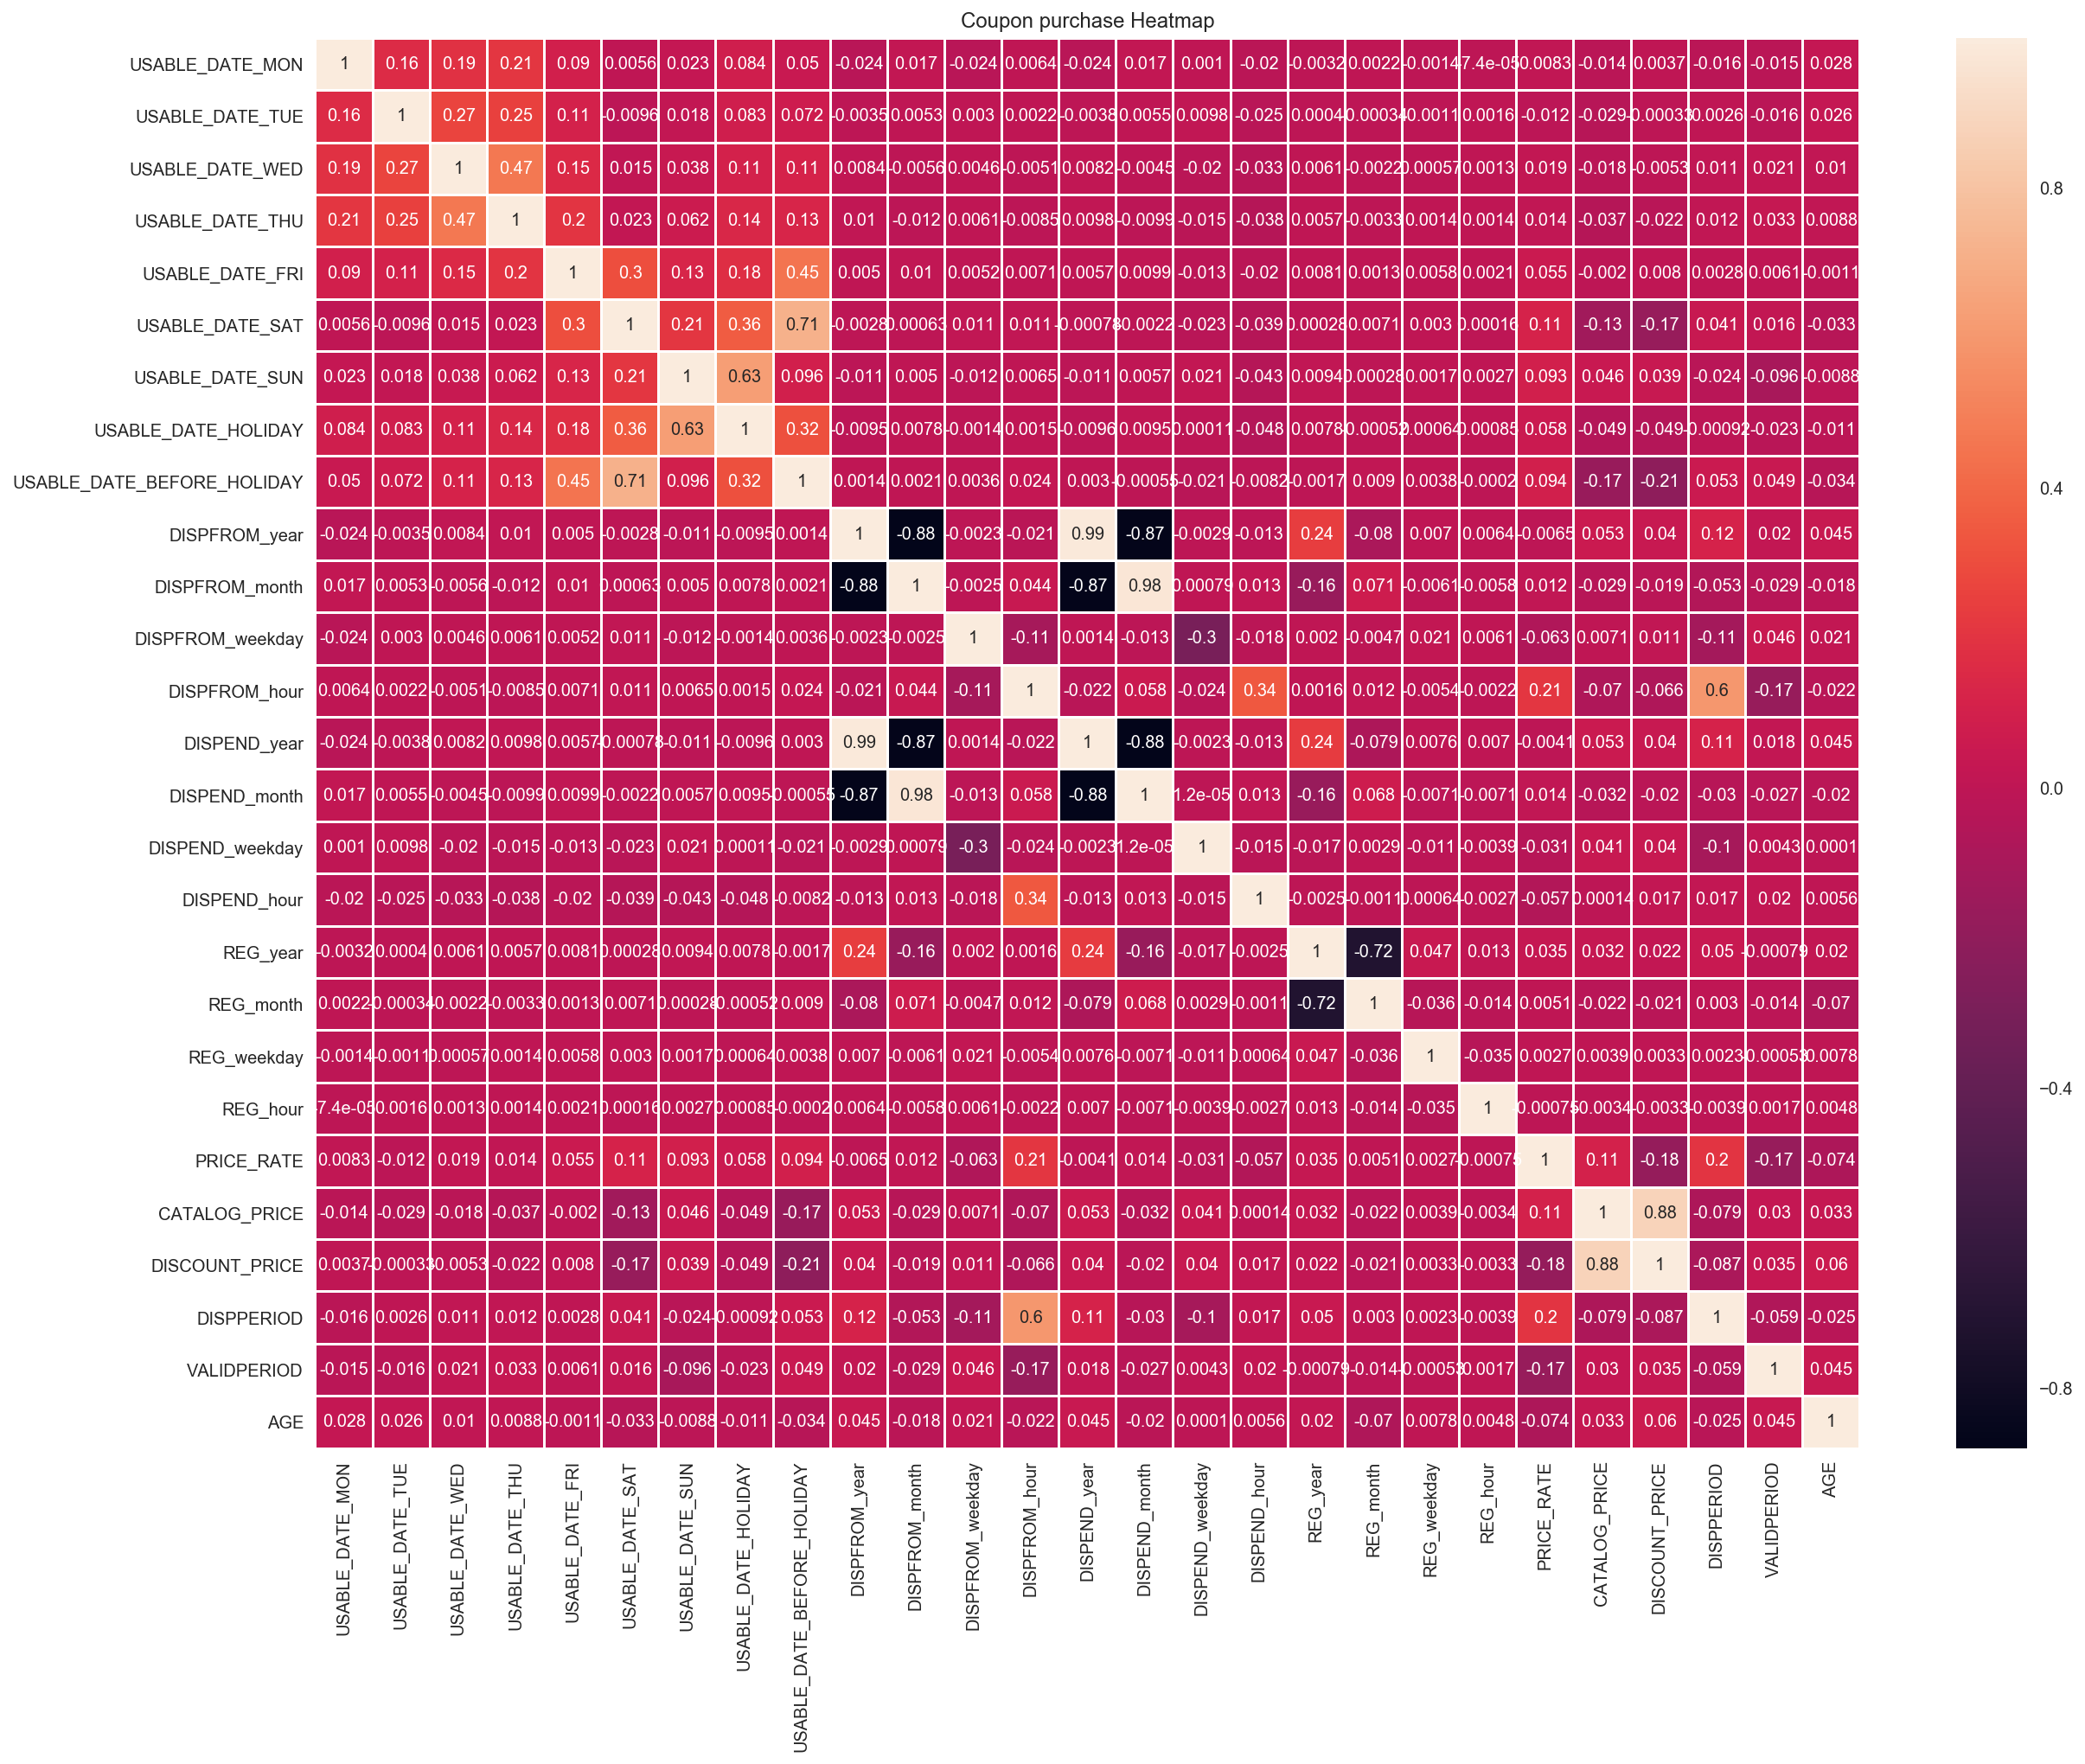

In [16]:
# correlation
correlation = train.drop(['USER_ID_hash', 'COUPON_ID_hash', 'CAPSULE_TEXT', 'GENRE_NAME', 'PURCHASE_FLG'], axis = 1)

f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(correlation.corr(), annot=True, linewidths=1)
plt.title('Coupon purchase Heatmap')
plt.show()